In [1]:
import pandas as pd

path_road_accidents = "C:\\Users\\LENOVO\\Desktop\\road-accidents.csv"

data = pd.read_csv(path_road_accidents)

df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


## 3. Create a textual and a graphical summary of the data


       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


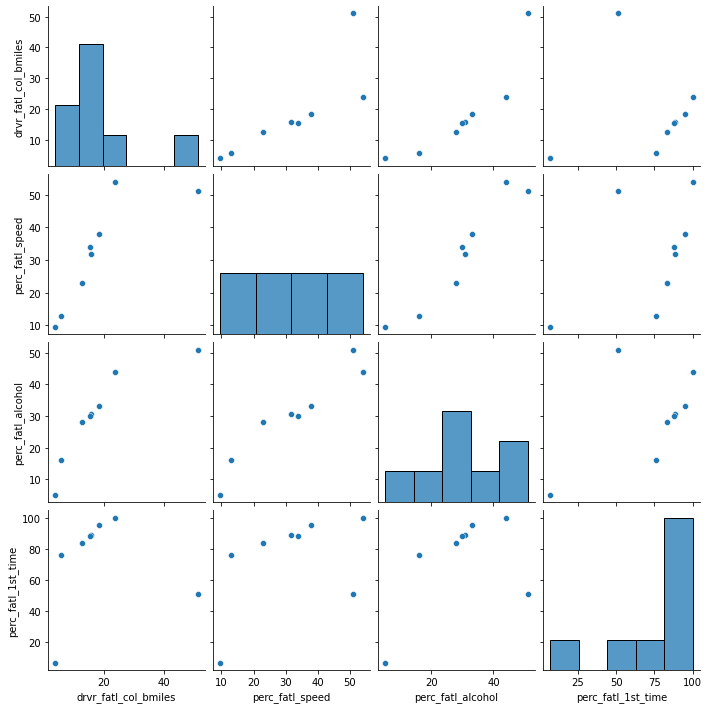

In [2]:
import seaborn as sns

describe_data = data.describe()
print(describe_data)

sns.pairplot(describe_data)

## Quantify the association of features and accidents

In [3]:
df.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


## Fit a multivariate linear regression

In [4]:
features = df[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]
output = df['drvr_fatl_col_bmiles']

In [5]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
linear_regression_model = LR.fit(features,output)
linear_regression_model.coef_

array([-0.04180041,  0.19086404,  0.02473301])

## Perform PCA on standardized data

Thecumulative variance of the first two principle components is 0.7947


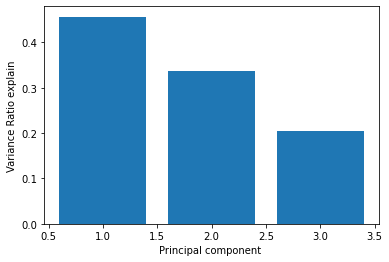

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

ss = StandardScaler()
features_scaled = ss.fit_transform(features)
pca = PCA()
pca.fit(features_scaled)

plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal component ')
plt.ylabel('Variance Ratio explain')

two_first_component_explain = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print('Thecumulative variance of the first two principle components is %.4f' %(two_first_component_explain))

## Visualize the first two principal components

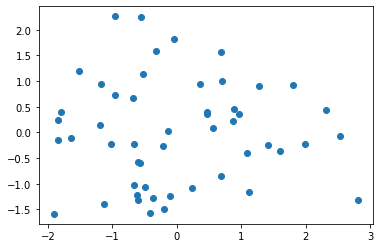

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_composition = pca.fit_transform(features_scaled)
pca_comp1 = pca_composition[:, 0]
pca_comp2 = pca_composition[:, 1]

plt.scatter(pca_comp1,pca_comp2)

## Find clusters of similar states in the data

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia value')

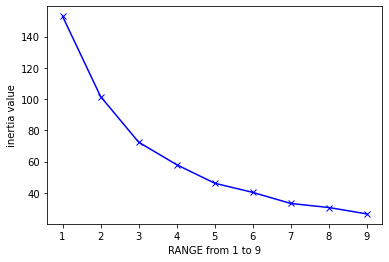

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias = []
for k in range(1,10):
    kmean = KMeans(n_clusters=k)
    kmean.fit(features_scaled)
    inertias.append(kmean.inertia_)
plt.plot(range(1,10),inertias,c='b',marker='x')
plt.xlabel('RANGE from 1 to 9')
plt.ylabel('inertia value')

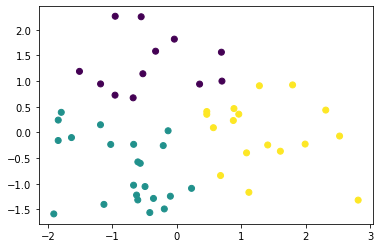

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmean = KMeans(n_clusters=3)
kmean.fit(features_scaled)
plt.scatter(pca_comp1,pca_comp2,c=kmean.labels_)

## Visualize the feature differences between the clusters

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent', ylabel='measurement'>

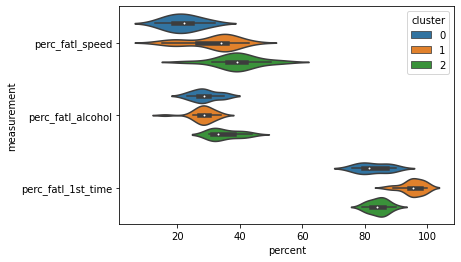

In [10]:
import pandas as pd
import seaborn as sns

data['cluster'] = kmean.labels_
car_melt = pd.melt(data, id_vars=['cluster'], var_name='measurement', value_name='percent',
                   value_vars =['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time'] )
sns.violinplot(car_melt['percent'],car_melt['measurement'],car_melt['cluster'])

## Compute the number of accidents within each cluster

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,number_of_accidents_fatal_col
0,Alabama,18.8,39,30,80,2,64914,1220.3832
1,Alaska,18.1,41,25,94,1,4593,83.1333
2,Arizona,18.6,35,28,96,1,59575,1108.0950
3,Arkansas,22.4,18,26,95,1,32953,738.1472
4,California,12.0,35,28,89,1,320784,3849.4080


,count,mean,sum
cluster,,,
0,12,920.385367,11044.6244
1,22,898.378595,19764.3291
2,17,872.132759,14826.2569


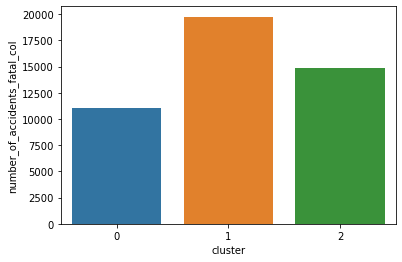

In [11]:
import pandas as pd
import seaborn as sns

path_mils_driven = "C:\\Users\\LENOVO\\Desktop\\miles-driven.csv"

mils_driven_data = pd.read_csv(path_mils_driven)
display(mils_driven_data.head())

data_mils = data.merge(mils_driven_data, on='state')
data_mils['number_of_accidents_fatal_col'] = (data_mils['drvr_fatl_col_bmiles'] * data_mils['million_miles_annually']) / 1000
display(data_mils.head())


sns.barplot(x='cluster', y='number_of_accidents_fatal_col',data=data_mils, estimator=sum, ci=None)
# calculate sum and mean for states
count_mean_sum = data_mils.groupby('cluster')['number_of_accidents_fatal_col'].agg(['count', 'mean', 'sum'])
display(count_mean_sum)

## Make a decision when there is no clear right choice

In [12]:
# which cluster would you choose?
number_of_clusters = 1